<div dir="rtl">
    <font size="4"><b>پروژه چهارم - Machine Learning</b><br><br></font>
    هدف پروژه: هدف این پروژه آشنایی با روشهای یادگیری ماشین به کمک کتابخانه scikit learn و تخمین قیمت خودروها در آگهی سایت دیوار به کمک آنهاست.<br>
    مجموعه داده: در این پروژه مجموعه داده تعدادی آگهی درج شده برای فروش خودرو در سایت دیوار در فرمت csv میباشد که در آن عنوان آگهی، توضیحات مربوط به خودرو، نوع خودرو (سبک یا سنگین)، زمان درج آگهی، تعداد تصاویر بارگذاری شده در آگهی، کارکرد خودرو و سال تولید آن مشخص شده است. همچنین یک ستون قیمت که همان ستون هدف میباشد نیز داریم.
</div>

In [1]:
pip install hazm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\users\artin\anaconda3\envs\ai\lib\site-packages (from nltk==3.3->hazm) (1.15.0)



<div dir = "rtl">
    <font size="4"><b>فاز اول: پیش پردازش داده ها و مشاهده داده</b><br></font>
    در این قسمت داده های ورودی را به مجموعه ای از ویژگی های قابل پردازش و داده های قابل استفاده برای مدلمان تبدیل میکنیم.<br> 
    ابتدا سطرهایی که خالی هستند و یا مقدار price برای آنها 1- است را حذف میکنیم.
</div>

In [2]:
def remove_nan(df):
    df = df[df['brand'].notna()]
    df = df[df['price'] != -1]
    return df

<div dir="rtl">
    سپس مقادیر ستونهای brand و category را به روش Label_Encoding جایگزین میکنیم که در پرسش 2 روشهای متفاوت و علت انتخاب این روش ذکر شده است.<br>
</div>

In [3]:
from sklearn import preprocessing
def encode(df):
    le = preprocessing.LabelEncoder()
    df['brand'] = le.fit_transform(df.brand.values)
    df = df.replace({"category": {"light": 0, "heavy": 1}})
    return df

<div dir="rtl">
    حال باید ستونهایی که در آنها مقادیر متنی ذخیره شده است را نرمالسازی کنیم. برای اینکار روشهای normalize، tokenize، حذف stop wordها و stemming بکار برده شده اند.
</div>

In [4]:
from hazm import *
def normalize(df):
    normalizer = Normalizer()
    df['description'] = df['description'].apply(lambda x: normalizer.normalize(x))
    df['title'] = df['title'].apply(lambda x: normalizer.normalize(x))

In [5]:
def tokenize(df):
    df['description'] = df['description'].apply(lambda x: word_tokenize(x))
    df['title'] = df['title'].apply(lambda x: word_tokenize(x))

In [6]:
def remove_stop_words(df):
    stopwords = stopwords_list() + ['(', ')','!','#','؛','»','«','؟','\"','-','/',':','[',']','.', '،', '*', '_']
    stopwords = set(stopwords)
    df['description'] = df['description'].apply(lambda x: [i for i in x if i not in stopwords])
    df['title'] = df['title'].apply(lambda x: [i for i in x if i not in stopwords])

In [7]:
def stemming(df):
    stemmer = Stemmer()
    df['description'] = df['description'].apply(lambda x: [stemmer.stem(i) for i in x])
    df['title'] = df['title'].apply(lambda x: [stemmer.stem(i) for i in x])

<div dir="rtl">
    مقادیر ستونهای year و created_at نیز باید به مقادیر عددی تبدیل شوند تا بتوان پردازش را روی آنها انجام داد.<br>
    برای تبدیل ستون created_at به عدد به این صورت عمل میکنیم که باتوجه به روز هفته و ساعت، مقدار ساعت را برحسب 24 ساعت ذخیره میکنیم.
    
</div>

In [8]:
def convert_to_int(df):
    df['year'] = df['year'].apply(str)
    df['year'] = df['year'].str.replace('<', '')
    df['year'] = df['year'].astype(int)

In [9]:
from datetime import *

def convert_to_datetime(df):
    date_time = []
    time = []
    cnt = 0
    days = {"Saturday" : 0, "Sunday" : 1, "Monday" : 2, "Tuesday" : 3, "Wednesday" : 4, "Thursday" : 5, "Friday" : 6}
    for row in df['created_at']:
        day = row.split()[0]
        date_time.append(datetime.strptime(str(row), "%A %I%p"))
        time.append(days[day] * 24 + date_time[cnt].hour)
        cnt += 1
    df['created_at'] = time

<div dir="rtl">
    <b>پرسش 1)</b>
    این نمودار میزان تاثیر فیچرهای مختلف بر روی ویژگی هدف و در واقع وابستگی آنها با ویژگی هدف را نشان میدهد. به کمک ین نمودار میتوان از فیچرهایی که بیشترین تاثیر را دارند برای مدلسازی های خود استفاده کنیم.<br>
    نمودار خواسته در قسمتهای آخر رسم شده است.
</div>

<div dir="rtl">
    <b>پرسش 2)</b>
    دو روش برای اینکار وجود دارد: 1) Label-Encoding (2 OneHot_Encoding <br>
    روشی که در این پروژه برای ستونهای brand و category انتخاب شده است روش Label_Encoding است. هر دو روش روی داده ها امتحان شد و تفاوت چشمگیری در نتیجه نهایی مشاهده نشد. فلذا برای راحتی کار به این دلیل که تعداد ستونها (فیچرها) در Label_Encoding کمتر است، این روش انتخاب شد.(توجه داریم که ستون category فقط یک مقدار دارد و تفاوتی نمیکند از کدام روش برای این ستون استفاده شود.) 
</div>

<div dir="rtl">
    <b>پرسش 3)</b>
    ستونهایی که داده های متنی در آنها ذخیره شده نیز باید قابل پردازش شوند. در داده های موجو دو ستون description و title اینگونه هستند که از روش tfidf آنها را به داده های قابل پردازش تبدیل میکنیم. این روش به این صورت عمل میکند که تعداد تکرار هر واژه را در هر سطر محاسبه میکند و در نهایت میتوانیم n تعداد از آنهایی که بیشترین تکرار را داشتند بدست آوریم.<br>
    اینکار دقت مدل را بالا میبرد چرا که این دو ستون نیز در مقدار ستون هدف موثر هستن.
</div>

In [10]:
def convert_to_sentence(df):
    df['description'] = df['description'].apply(lambda x: " ".join(x))
    df['title'] = df['title'].apply(lambda x: " ".join(x))

In [27]:
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer, TfidfTransformer)
def calculate_tfidf(df):
    df['text'] = df['description'].str.cat(df['title'],sep=" ")
    vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_features=50)  
    vectorized = vectorizer.fit_transform(list(df['text']))
    tfidf = pd.DataFrame(vectorized.toarray(), index=[int(i) for i in range(1, 1+len(df['text']))], columns=vectorizer.get_feature_names())
    df[vectorizer.get_feature_names()] = tfidf[vectorizer.get_feature_names()].values
    return df

def calculate_count_vect(df):
    df['text'] = df['description'].str.cat(df['title'],sep=" ")
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=100)  
    vectorized = vectorizer.fit_transform(list(df['text']))
    count_vect = pd.DataFrame(vectorized.toarray(), index=[int(i) for i in range(1, 1+len(df['text']))], columns=vectorizer.get_feature_names())
    df[vectorizer.get_feature_names()] = count_vect[vectorizer.get_feature_names()].values
    return df

def remove_string_columns(df):
    df = df.drop(['description', 'title', 'text'], axis=1)
    return df

<div dir="rtl">
    <b>پرسش 4)</b>
    روشهای گوناگونی وجود دارد، 1) یک روش این است که آنها را حذف کنیم. بدلیل اینکه حجم داده ها در این پروژه زیاد بود  و حذف آنها تاثیر زیادی بر داده ها نمگذاشت ما از این روش استفاده کردیم.<br>
    2) روشهای دیگری وجود دارد مثل جایگزین کردن مقادیر از دست رفته با میانگین یا میانه ستون و غیره
</div>

<div dir="rtl">
    <b>محاسبه Information Gain</b><br>
    در این قسمت نیز information gain برای ستونها محاسبه و نمودار آن نیز رسم شده است. 
</div>

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

def calculate_mutual_info_reg(df):
    x = df[['brand', 'category', 'created_at', 'image_count', 'mileage', 'year']]
    y = df['price']
    mi = mutual_info_regression(x, y)
    mi = pd.Series(mi)
    mi.index = x.columns
    mi.sort_values(ascending=False, inplace = True)
    return mi

def mutual_info_diagram(mi):
    plt.title('Mutual information')
    mi.plot.bar()
    plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
def scale(df):
    scaler = MinMaxScaler()
    price = df['price']
    df_scale = scaler.fit_transform(df.drop(['price']))
    df = pd.DataFrame(df_scale, columns=df.columns)
    df['price'] = price
    return df

<div dir = "rtl">
    <font size="4"><b>فاز دوم: پیشبینی قیمت</b><br></font>
     در این قسمت داده ها را به دو قسمت یادگیری و آزمون تقسیم میکنیم. 20 درصد داده را برای آزمون و 80 درصد آنرا برای یادگیری قرار میدهیم (در کل مقداری بین 10 تا 30 درصد برای آزمون بهترین تخمین را میدهد). سپس سه مدل بر پایه KNN و decision tree و linear regression پیاده سازی میکنیم. دقت مدلسازی را نیر بر اساس معیارهای RMSE و MSE اندازه گیری میکنیم.<br>
</div>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as RMSE

def split_data(df):
    x = df.drop(['price'], axis=1)
    y = df['price']
    x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.40)
    return x_train, y_train, x_validation, y_validation

def evaluate(y_validation, y_predict):
    rmse = RMSE(y_validation, y_predict, squared=False)
    mse = RMSE(y_validation, y_predict)
    return rmse, mse

<div dir="rtl">
    <b>مدل KNN با هایپرپارامتر n_neighbors:</b>
</div>

In [15]:
def k_nearest_neighbor(x_train, y_train, x_validation, n):
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(x_train, y_train)
    y_predict = KNN.predict(x_validation)
    return y_predict

<div dir="rtl">
    <b>مدل Decision Tree با هایپرپارامتر max_depth و min_samples_split:</b>
</div> 

In [16]:
def decision_tree(x_train, y_train, x_validation, d, m):
    DT = DecisionTreeRegressor(max_depth=d, min_samples_split=m)
    DT.fit(x_train, y_train)
    y_predict = DT.predict(x_validation)
    return y_predict

<div dir="rtl">
    <b>مدل Linear Regression:</b>

In [17]:
def linear_regression(x_train, y_train, x_validation):
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_predicted = LR.predict(x_validation)
    return y_predicted

<div dir="rtl">
    <b>مدل Random Forest:</b>
</div>

In [18]:
def random_forest(x_train, y_train, x_validation, n):
    RF = RandomForestRegressor(n_estimators=n, random_state=0)
    RF.fit(x_train, y_train)
    y_predicted = RF.predict(x_validation)
    return y_predicted

<div dir="rtl">
    <b>پرسش 5)</b>
    همانطور که پیشتر گفته شد 20 درصد داده ها را برای آزمون و 80 درصد را برای یادگیری در نظر گرفتیم. در کل مقدار 10 تا 30 درصد برای آزمون مقدار مناسبی است که بهترین تخمین را میدهد.<br>
     اگر اندازه داده های یادگیری خیلی کم باشد بدلیل یادگیری بیش از حد داده های train تخمین درستی به ما نمیدهد و مدل general نخواهد بود و overfitting رخ دهد و از طرف دیگر اگر تعداد داده های یادگیری خیلی بزرگ باشد مقداری که برای آزمون باقی میماند خیلی کم میشود و در این صورت underfitting رخ میدهد.
</div>

In [28]:
import pandas as pd
df = pd.read_csv("vehicles.csv")
df = remove_nan(df)
df = encode(df)
normalize(df)
tokenize(df)
remove_stop_words(df)
stemming(df)
convert_to_int(df)
convert_to_datetime(df)
convert_to_sentence(df)
df = calculate_count_vect(df)
df = remove_string_columns(df)

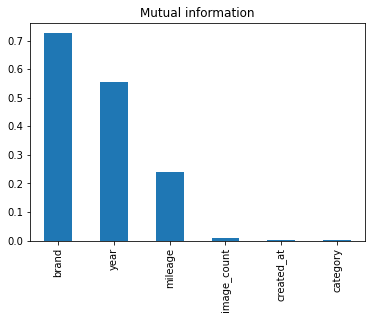

In [29]:
mi = calculate_mutual_info_reg(df)
mutual_info_diagram(mi)

In [30]:
x_train, y_train, x_validation, y_validation = split_data(df)
KNN_predict = k_nearest_neighbor(x_train, y_train, x_validation, 10)
rmse1, mse1 = evaluate(y_validation, KNN_predict)
print("K nearest neighbor:")
print("RMSE = ", rmse1)
print("MSE = ", mse1)

K nearest neighbor:
RMSE =  24070810.326382108
MSE =  579403909768663.5


In [31]:
decision_tree_predict = decision_tree(x_train, y_train, x_validation, 10, 3)
rmse2, mse2 = evaluate(y_validation, decision_tree_predict)
print("Decision tree:")
print("RMSE = ", rmse2)
print("MSE = ", mse2)

Decision tree:
RMSE =  12630440.767036319
MSE =  159528033969613.0


In [32]:
linear_reg = linear_regression(x_train, y_train, x_validation)
rmse3, mse3 = evaluate(y_validation, linear_reg)
print("Linear regression:")
print("RMSE = ", rmse3)
print("MSE = ", mse3)

Linear regression:
RMSE =  19913747.23434895
MSE =  396557328913540.44


<div dir="rtl">
    <b>پرسش 6)</b>
    با رسم نمودار خطا بر حسب عمق درخت مشاهده میشود که مدل در عمق های کم عملکرد اصلا خوبی ندارد و در عمق های خیلی زیاد عملکرد بهتر میشود ولی بازم در عمق کمتر خطا با مقدار کمتری وجود داشته است. پس باید عمق را نه خیلی زیاد و نه خیلی کم انتخاب کنیم و مقدار بهینه آن (در اینجا 10) انتخاب شود.
</div>

In [34]:
rmse = []
mse = []
x = []
for i in range(1, 60):
    dt_predict = decision_tree(x_train, y_train, x_validation, i, 2)
    r, m = evaluate(y_validation, dt_predict)
    rmse.append(r/1000000)
    mse.append(m/1000000)
    x.append(i)

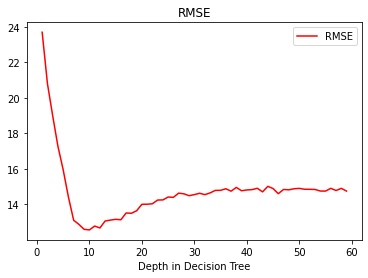

In [35]:
plt.plot(x, rmse, color="red", label="RMSE")
plt.title("RMSE")
plt.xlabel("Depth in Decision Tree")
plt.legend();
plt.show()


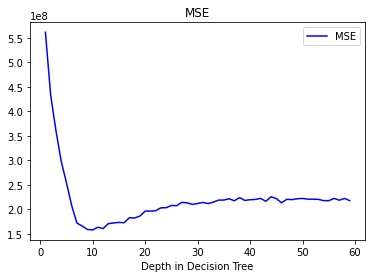

In [36]:
plt.plot(x, mse, color="blue", label="MSE")
plt.title("MSE")
plt.xlabel("Depth in Decision Tree")
plt.legend();
plt.show()

<div dir="rtl">
    <b>پرسش 7)</b>
    بایاس و واریانس نشان میدهند که مدل ما چقدر general است و پیشبینی آن جامعیت دارد. در واقع اگر مقدار بایاس زیاد باشد این یعنی به داده های یادگیری توجه کمی شده است و اگر واریانس زیاد باشد به این معنی است که به داده های یادگیری بیش از حد اهمیت داده است. پس اگر بایاس خیلی بزرگ باشد و واریانس کوچک در این صورت underfitting رخ میدهد و برعکس اگر واریانس خیلی بزرگ باشد و بایاس کم باشد overfitting رخ میدهد مه هیچ یک از دو حالت برا ما مطلوب نیست.<br>
    در مدلسازی random forest چون تصمیمگیری از روی چندین درخت تصمیم میباشد پیشبینی میکنیم که خطا یعنی بایاس و واریانس نسبت به درخت تصمیم کمتر باشد.
</div>

In [33]:
random_for = random_forest(x_train, y_train, x_validation, 40)
rmse4, mse4 = evaluate(y_validation, random_for)
print("Random forest:")
print("RMSE = ", rmse4)
print("MSE = ", mse4)

Random forest:
RMSE =  11113059.917479154
MSE =  123500100729481.77
